In [1]:
%load_ext autoreload
%autoreload 2

from tqdm import tqdm
import pandas as pd
import numpy as np
import gzip
import json
import math
from datetime import datetime
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
import sys
sys.path.append('..')
from helper.manage_orderbooks_v2 import extract_orderbooks_for_one_currencypair, load_orderbook_snapshot, plot_episode, OrderbookEpisodesGenerator
from helper.orderbook_container import OrderbookContainer
from helper.orderbook_trader import OrderbookTradingSimulator

In [3]:
filename = '/home/axel/data/obs_2017-02_USDT_BTC_range1.2.dict'

data = load_orderbook_snapshot(filename, last_line=60)

T = 4
period_length = 15
episode_windows = OrderbookEpisodesGenerator(filename=filename, episode_length=T*period_length)
print("Length of episode_windows: {}".format(len(episode_windows)))

100%|██████████| 60/60 [00:03<00:00, 16.12it/s]


Loaded 60 orderbooks from file '/home/axel/data/obs_2017-02_USDT_BTC_range1.2.dict'.
Length of episode_windows: 670


In [4]:
episode_windows[1][0]

OrderbookContainer from 2017-02-01T01:00
  1603 bids (best: 964.219522)
  783 asks (best: 967.755823)
  kind: 'orderbook'

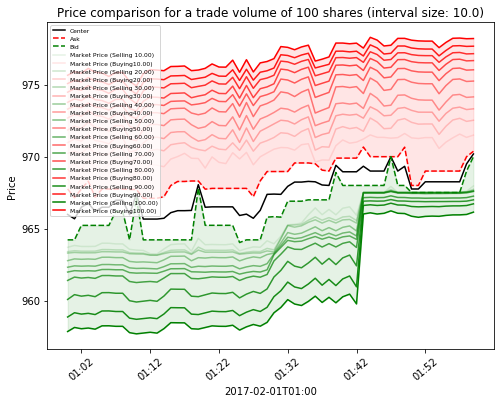

In [5]:
plot_episode(episode_windows[1], volume=100, intervals=10)

#### Test Orderbook plot, print and compare_with

,Amount,Type
962.000000,3.812900,bid
962.194102,0.034303,bid
965.866675,0.014157,bid
965.928336,NaN,center
965.990000,62.438301,ask
966.000000,0.735208,ask
967.000000,0.028217,ask


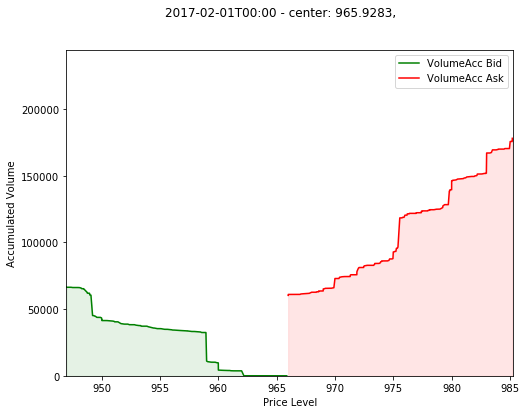

OrderbookContainer from 2017-02-01T00:00
  1559 bids (best: 965.866675)
  781 asks (best: 965.99)
  kind: 'orderbook'
OrderbookContainer from 2017-02-01T00:01
  1550 bids (best: 965.662455)
  782 asks (best: 965.98)
  kind: 'orderbook'


In [6]:
orderbook = data[0]
orderbook2 = data[1]
orderbook3 = data[2]

display(orderbook.head(3))
orderbook.plot(range_factor=1.02)  # outfile='sample.pdf')
print(orderbook)
print(orderbook2)

In [ ]:
orderbook = data[0]
orderbook2 = data[1]

display(orderbook.head())
display(orderbook2.head())

print("\nCompare two orderbooks:")
diff = orderbook2.compare_with(other=orderbook)

display(diff.head(10))
print(diff)

In [ ]:
P = 15
vol=100
T = 4
episode_length = T*P
print("episode_length", episode_length)
episodes = int(len(data) / episode_length)

episode_windows = []
for e in range(0, episodes):
    episode_start = e*episode_length
    episode_end = (e+1)*episode_length
    window = [ob.copy() for ob in data[episode_start:episode_end]]
    print("episode_windows[{}] = orderbooks[{}:{}], length={}".format(e, episode_start, episode_end, len(window)))
    
    # window = [orderbooks[e*episode_length + idx].copy() for idx in range(episode_length)]
    episode_windows.append(window)
    
print("\nEpisodes: {}, orderbooks per episode: {}".format(len(episode_windows), len(episode_windows[0])))

ob = episode_windows[0][0]
ob2 = episode_windows[0][-1]
display(ob.head(3))
display(ob2.head(3))
plot_episode(episode_windows[0], volume=vol)

#### Test get_current_price()

In [ ]:
display(orderbook.head(3))
vol = 10

for factor in [0.25, 0.5, 0.75, 1.]:
    res = orderbook.get_current_price(vol*factor)
    print("MarketOrderPrice for {} shares: {:1.4f} (worst price: {})".format(vol*factor, res[0], res[1]))

#### Test orderbook.head and tail

In [ ]:
display(orderbook.head(2))
display(orderbook.tail(2))

#### Test parameter limit

In [ ]:
len(episode_windows[0])
from time import sleep, perf_counter as pc

In [ ]:
def test_trade():
    P = 15
    vol=100
    T = 4        
    
    datasub = episode_windows[0]
    plot_episode(datasub, volume=vol, intervals=10)
    
    ots = OrderbookTradingSimulator(orderbooks=datasub, volume=vol, tradingperiods=T, period_length=P)
    
    summary = ots.trade(limit=967, verbose=False)
    summary = ots.trade(limit=967, verbose=False)
    summary = ots.trade(limit=967, verbose=False)
    summary = ots.trade(limit=967, verbose=False)
    
    display(ots.history)
    display(summary)
    
    print(summary['cashflow']/100.)
    print(summary['cashflow'])
    print(ots.history['cashflow'].sum())
    
    return ots.history

hist = test_trade()

In [ ]:
print(hist[['ASK', 'BID', 'CENTER', 'LIMIT', 'VOLUME', 'avg', 'cost', 'forced', 'high', 'volume_traded']].to_latex(float_format="%.3f"))

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    summary = ots.trade(limit=706, verbose=True)

display(ots.history)
display(summary)


#### Test parameter aggression_factor

In [ ]:
P = 2
vol=100
T = 4
ots = OrderbookTradingSimulator(orderbooks=episode_windows[0][:T*P], volume=vol, tradingperiods=T,
                                period_length=P)

for e in tqdm(range(T)):
    action=0.9
    summary = ots.trade(agression_factor=action, verbose=True, extrainfo={'ACTION':action})
display(ots.history)